<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

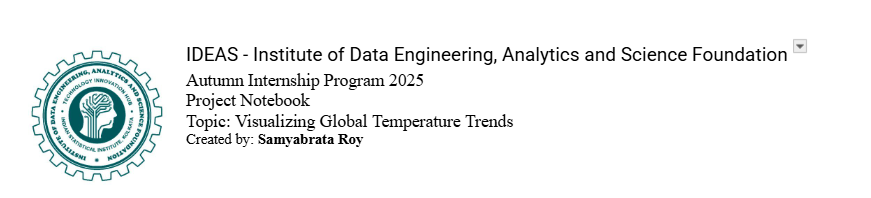

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)
   
   Ans:Time-series data is a sequence of data points collected or recorded at specific time intervals (e.g., hourly, daily, monthly). Each observation in the dataset is associated with a timestamp, and the data is ordered in time.
Examples:
•	Daily COVID-19 cases
•	Monthly temperature
•	Yearly sales revenue
It is especially useful when analyzing trends, seasonal patterns, or forecasting future values.

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!
   
   Ans:Yes, Python is a great choice, and here’s why:
•	Libraries like pandas, NumPy, and datetime simplify time-series manipulation.
•	Visualization tools such as matplotlib, seaborn, and Plotly help uncover trends and seasonality.
•	Advanced time-series packages like statsmodels, scikit-learn, and Prophet enable forecasting and decomposition.
•	Easy integration with ML frameworks (TensorFlow, PyTorch) for advanced models.
Overall: Python offers flexibility, a huge community, and mature libraries that are well-suited for time-series work.
________________________________________


---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

Ans:If the dataset isn’t hosted anywhere, we can either:

1.	Upload it manually,
2.	Load it from a local directory,
3.	Create a small test dataset yourself, or
4.	Retrieve it using an API (if available).


In [ ]:
# Uploading local CSV file (e.g., using Jupyter or Google Colab)
from google.colab import files  # Only if using Google Colab

uploaded = files.upload()

import io
df_temp = pd.read_csv(io.BytesIO(uploaded['your_file_name.csv']))
print(df_temp.head())


For non-Colab setups (like Jupyter on your computer):

In [ ]:
df_temp = pd.read_csv("path_to_your_local_file.csv")

**Corrections and Improvements Before Plot 1**

Before plotting, fix these issues in our earlier code:

•	subset['Year'] is undefined in Plot 1.

•	Extract Year and Month after parsing Date.

So we fix and prepare the dataset like this:


In [ ]:
# Ensure Date is datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month


** Plot 1: Monthly Temperature Over Time (per Source)**

In [ ]:
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Mean'], label=source)

plt.title("Monthly Temperature Increase by Source")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


**Plot 2: 12-Month Moving Average**

In [ ]:
df_temp = df_temp.sort_values(by="Date")

df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean())

plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with 12-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (Smoothed)")
plt.legend()
plt.show()




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

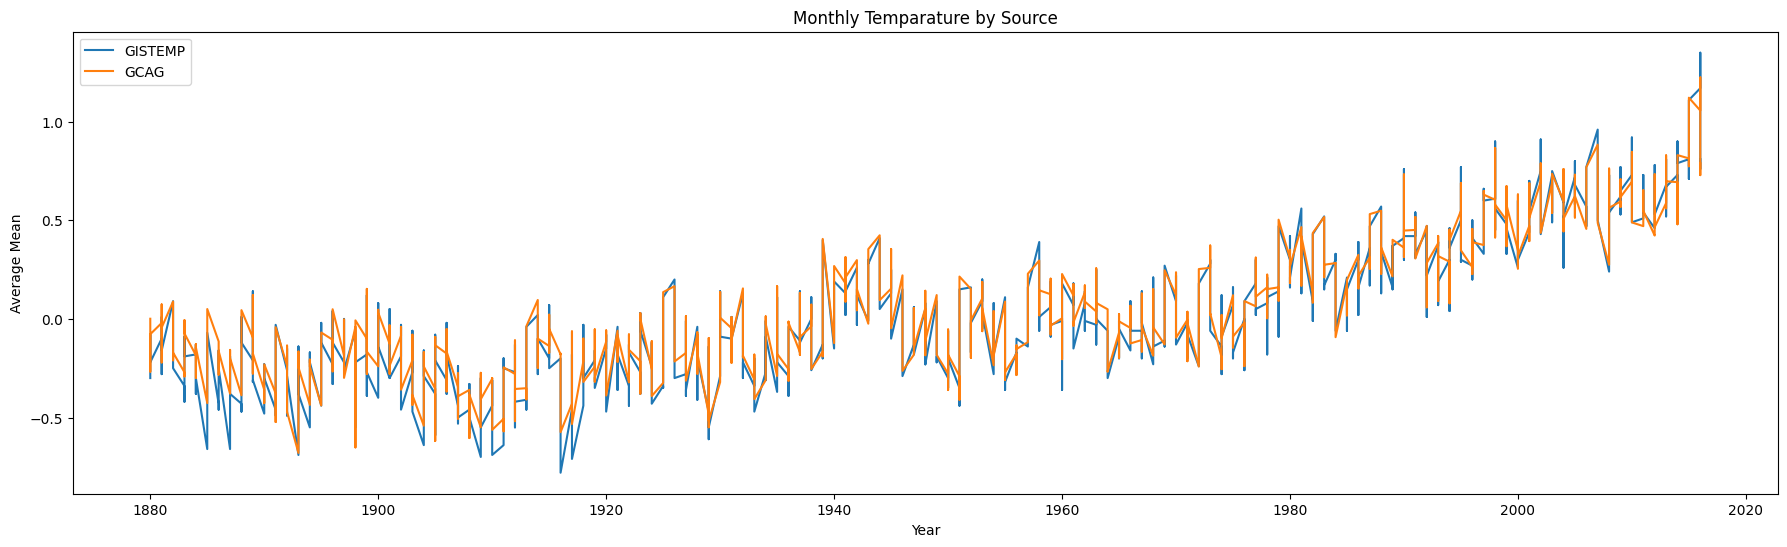

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

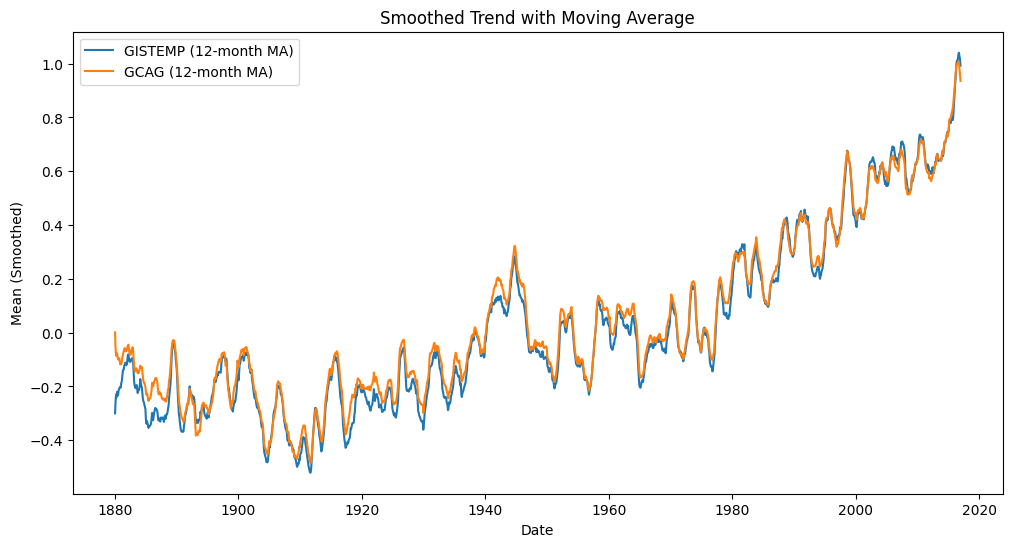

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Plot 2 visualizes the smoothed trend of global temperature anomalies (or mean temperatures) over time, using a 12-month moving average.
In the raw temperature data, monthly fluctuations can be quite noisy — affected by short-term weather changes, volcanic eruptions, oceanic events (like El Niño/La Niña), etc. The moving average smooths these out to reveal underlying long-term patterns.
________________________________________
📈 Key Interpretations

1.	**Long-Term Warming Trend**

	The moving average likely shows a clear upward trend over the years.
	This indicates a gradual increase in global temperature anomalies, consistent with global warming patterns.

2.	**Reduced Seasonal Noise**

	Since the moving average takes the mean of each month plus the 11 surrounding months, seasonal variations (like winter vs summer differences) are averaged out.
This makes it easier to see the climate trend, not just short-term variability.

3.	**Comparing Data Sources (GCAG vs GISTEMP)**

	Both sources probably show similar overall patterns, but with minor deviations due to differences in data collection or analysis methods.
	If both follow the same trend, that’s strong evidence of data reliability and consistency across organizations.

4.	**Periods of Acceleration or Plateau**

Some intervals might show accelerated warming (e.g., late 20th century onward).
	Occasional plateaus or dips could appear during volcanic cooling events or data anomalies.
________________________________________
🧠** In Simple Terms**

Plot 2 tells us that the Earth’s average temperature has been steadily rising over time, even when short-term fluctuations are smoothed out. It transforms noisy, month-to-month data into a clear story of long-term climate change.



Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

**Plot 2.5: Stronger Smoothing (e.g., 24-Month or Loess)**

Example using 24-month moving average for stronger smoothing:

In [ ]:
df_temp['Stronger_MA'] = df_temp.groupby('Source')['Mean'].transform(
    lambda x: x.rolling(window=24, min_periods=1).mean())

# Plot for one source (e.g., GCAG)
gcag_data = df_temp[df_temp['Source'] == 'GCAG']

plt.figure(figsize=(12,6))
plt.plot(gcag_data['Date'], gcag_data['Stronger_MA'], color='darkred')
plt.title("GCAG: 24-Month Moving Average Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()





---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

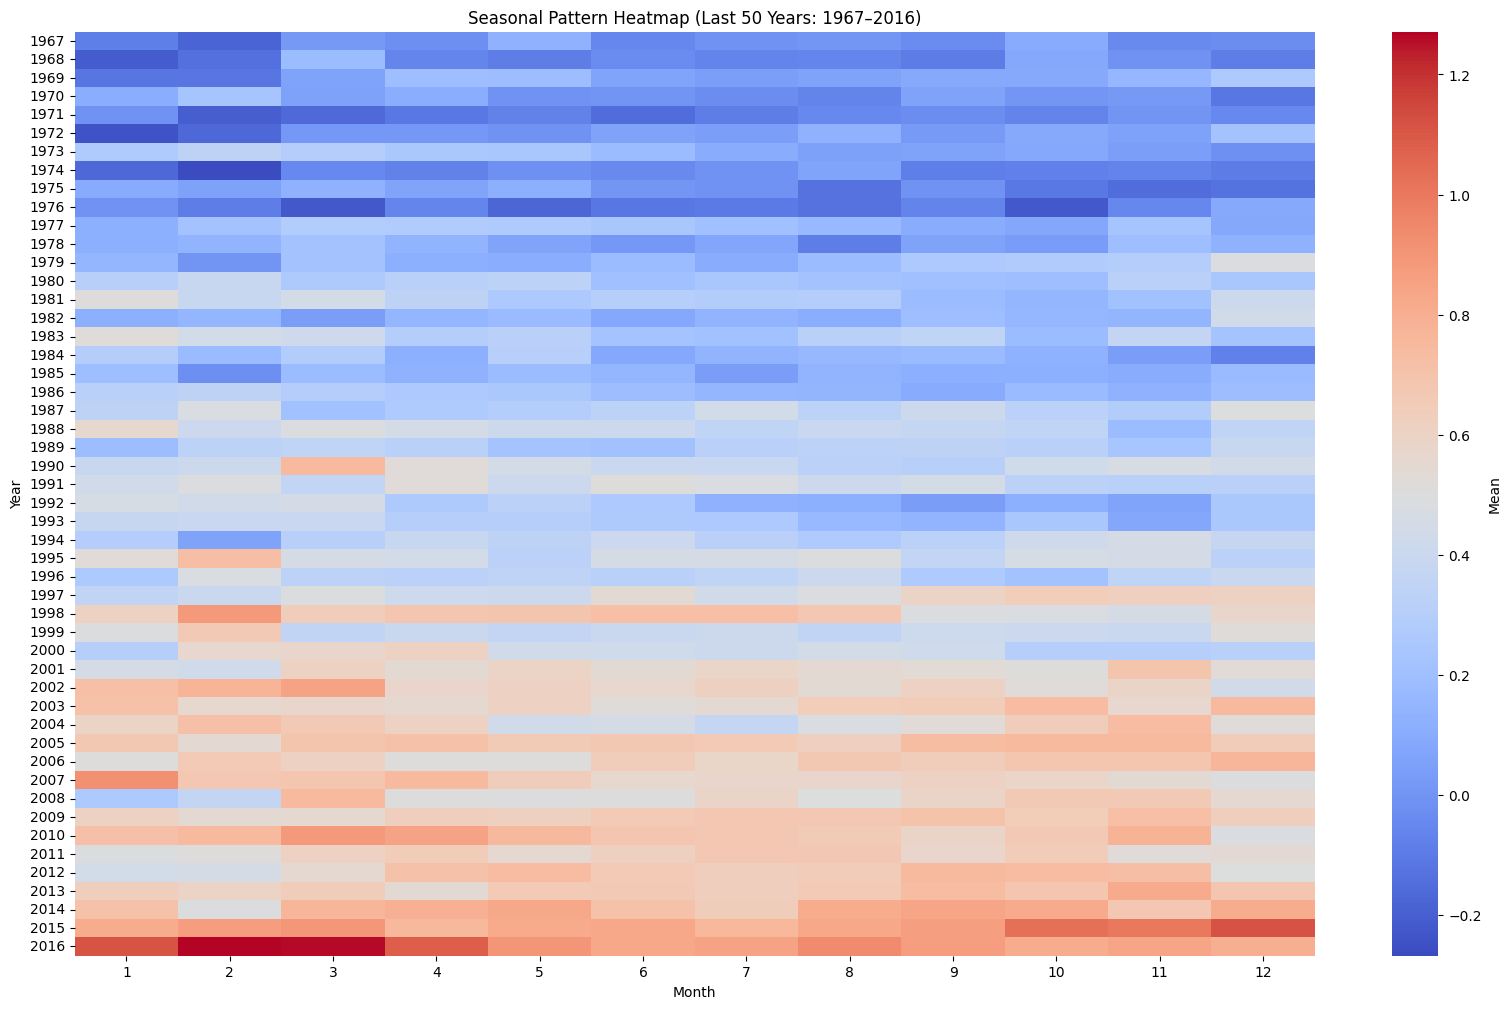

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

ANS:Heatmap for Last 20 Years

We’ll follow a similar process:

1.	Extract year and month.
2.	Filter only the last 20 years.
3.	Group data to calculate monthly mean.
4.	Pivot and plot using seaborn.heatmap.

**Code: Seasonal Temperature Heatmap (Last 20 Years)**


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month, take mean across sources
seasonal_data_20 = df_last20.groupby(['Year', 'Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data_20 = seasonal_data_20.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data_20, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean Temperature'})
plt.title(f"Seasonal Temperature Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


What This Shows:

•	Horizontal Patterns: You can clearly see seasonal trends—like warmer mid-year months and cooler early/late months.

•	Vertical Changes: Over time, colors may shift towards the warmer end (reds), indicating increasing temperatures in recent years.

•	Anomalies: Spikes or dips in color tone that break the usual seasonal pattern can indicate abnormal years (like strong El Niño/La Niña effects).




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

ANS:

**Alternative Chart Types to Heatmap for Seasonal Variation:**

**Here are some chart types that can effectively show seasonal patterns across time:**

1.	Line Plot (Faceted by Year or Month)
2.	Box Plot (Month vs. Temperature)  (Good for showing distribution + seasonality)
3.	Violin Plot (Month vs. Temperature)
4.	Polar Plot / Radial Chart (Cyclic Monthly Pattern)
5.	Facet Grid Line Plot (Small Multiples by Year)

 Recommended Option: Box Plot (Month vs. Mean Temperature)

Box plots are a great alternative to heatmaps for seasonal data. They show:

•	Median temperature

•	Spread (IQR) across years for each month

•	Outliers, if any (e.g., temperature anomalies)

Let’s plot it 👇

 **Code to Visualize Seasonal Variation with a Box Plot:**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Month is extracted
df_temp['Month'] = df_temp['Date'].dt.month
df_temp['Year'] = df_temp['Date'].dt.year

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Box plot: Month vs Mean temperature
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_last50, x='Month', y='Mean', palette='coolwarm')

plt.title(f"Monthly Temperature Distribution Over Last 50 Years ({latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.xticks(ticks=range(0,12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**Interpretation:**

•	Clear seasonal pattern: Summer months (e.g., July, August) likely show higher median temperatures.

•	Winter months show lower values.

•	The spread of the boxes indicates variability (e.g., climate change can widen the spread).

•	Outliers (if present) show anomalies like extreme heat/cold events.




---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

Plot 2 tells us that the Earth’s average temperature has been steadily rising over time, even when short-term fluctuations are smoothed out. It transforms noisy, month-to-month data into a clear story of long-term climate change.

✅ Datasets We could use

Here are a few accessible public datasets of monthly / seasonal temperature (or climate) time-series, which match well with your notebook’s “monthly mean temperature” style data:

•	Global Temperature Time Series (from DataHub) — includes both monthly and annual global mean temperature anomaly data (sources: GISTEMP, GCAG). DataHub+2GitHub+2

•	Monthly, Seasonal and Annual Mean Temperature Series for the period 1901 2021 (India) — through the Open Government Data Platform India. Data.gov

•	Monthly, Seasonal and Annual Maximum Temperature Series for the period 1901 2021 (India) — similar, but with maximum temperatures. Data.gov

🧮 Suggested workflow (code & analysis)
Here’s how we might go about it (very similar to your notebook’s structure):

1.	Load the dataset
2.	import pandas as pd
3.	url = "..."  # link to your chosen dataset
4.	df = pd.read_csv(url)


If you download it locally (from your machine) instead of via URL, you can use:

df = pd.read_csv("path/to/your/localfile.csv")

5.	***Pre‐processing*** :
	Ensure a ‘Date’ or ‘Year’ + ‘Month’ column exists (or create it).
Convert to datetime if needed:
	df['Date'] = pd.to_datetime(df[['Year','Month']].assign(DAY=1))
Sort by date.
	Possibly fill or drop missing values.
	Create any additional columns like Year, Month from the date.
6.	**Plot 1: Trend over time**

	A line chart of “Mean” (or anomaly) vs Date or Year.
	If multiple sources or regions exist, overlay them.
	Use matplotlib / seaborn / plotly.
7.	**Plot 2: Moving average / Smoothing**

	Compute e.g.: 12-month rolling mean (window=12) grouped (if you have groups e.g., region).
	df['Moving_Avg'] = df['Mean'].rolling(window=12, min_periods=1).mean()
	Plot the smoothed trend.
8.	**Plot 3: Seasonal heatmap**

	Extract Year and Month.
	Pivot table: index = Year, columns = Month, values = Mean (or anomaly).
Use seaborn heatmap.
	This helps visualise “which months are warmer/cooler and how the seasonality evolves”.
  
9.	**Additional: Alternative chart to the heatmap**

	E.g., a box-plot per Month across years (to show seasonal distribution).
	Or a violin plot per month.
	Or a line plot of each month’s value over years (so 12 lines: Jan, Feb, … Dec) showing seasonal cycles.
	Then you can comment: “In January values have been increasing over time…”, “The amplitude between months has shrunk/expanded…”, etc.
10.	**Interpretation / Inferenc**e

	Look for trend (warming or cooling).
	Look for seasonal variation (which months are highest / lowest).
	Look for changes in seasonality over time (e.g., summer months warming faster than winter).
	Provide commentary: what might this imply for climate, for region, etc.

  🧑‍💻 **Example: Using the Global Temperature Time Series**

Here’s a rough code snippet tailored to the Global Temperature Time Series dataset:





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
url = "https://datahub.io/core/global-temp/r/monthly.csv"
df = pd.read_csv(url)

# Pre‐process
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Trend plot
plt.figure(figsize=(12,6))
for src in df['Source'].unique():
    sub = df[df['Source']==src]
    plt.plot(sub['Date'], sub['Mean'], label=src)
plt.title("Monthly global mean temperature anomaly by Source")
plt.xlabel("Date")
plt.ylabel("Mean (°C anomaly)")
plt.legend()
plt.show()

# 12‐month moving average
df['Moving_Avg'] = df.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12,min_periods=1).mean())
plt.figure(figsize=(12,6))
for src in df['Source'].unique():
    sub = df[df['Source']==src]
    plt.plot(sub['Date'], sub['Moving_Avg'], label=f"{src} (12‐mo MA)")
plt.title("Smoothed global mean temperature anomaly (12‐mo MA)")
plt.xlabel("Date")
plt.ylabel("Anomaly (°C)")
plt.legend()
plt.show()

# Seasonal heatmap (last 50 years)
latest_year = df['Year'].max()
df_last50 = df[df['Year'] >= latest_year - 49]
seasonal = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()
heatmap_data = seasonal.pivot(index='Year', columns='Month', values='Mean')
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label':'Mean anomaly (°C)'})
plt.title(f"Seasonal pattern heatmap (last 50 years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
#Then we could add the “alternative chart” (box plot by month, for instance):
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Mean', data=df_last50)
plt.title("Distribution of monthly mean anomaly across years (last 50 years)")
plt.xlabel("Month")
plt.ylabel("Anomaly (°C)")
plt.show()

